### EndTerm Assignment 

1-2 page(s) pdf file including 

1) Accuracy of your model 

2) a scatterplot in the first two principal components of the data and color the data points according to their label (use diff combinations of shape and color for the 10 digits)


And also - 

2) A CSV file containing two columns (ImageId and Label), imageid is given in test file and the label will be predicted value for that image. Sample_Submision.csv is provided on the same link.

3) Code (Python/Matlab). 


### Find below the code to apply the model , calculate accuracies, PCA and scatterplot





In [2]:
from sklearn.neighbors import KNeighborsClassifier


import pandas as pd
import numpy as np 
import random 
import matplotlib.pyplot as plt

##silence future warnings 
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [3]:
mnist_data = pd.read_csv(r'C:\Users\User\OneDrive\DataMining\Assigments\EndTermAssignment\train.csv') 
mnist_data.info()
mnist_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# is there any duplicate 
extra = mnist_data[mnist_data.duplicated()]
print("There are no duplicate records ",extra.shape)

There are no duplicate records  (0, 785)


In [7]:
# is there any duplicate 
nulls = mnist_data[mnist_data.isnull()]
print("There are no duplicate records ",nulls.shape)

There are no duplicate records  (42000, 785)


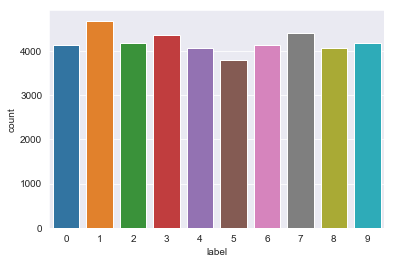

In [8]:
#set of labels available 
import seaborn as sns

sns.set_style('darkgrid')
sns.countplot(x='label', data=mnist_data)
sns.title="Count of labels"


In [9]:
#drop the label 
X=mnist_data.drop('label',1)
y=mnist_data['label']

In [10]:
#split the data 

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1000
)

We are going to scale the features to be between 0 and 1. It is possible that with the different variations of the pixels, the scale can help improve the prediction

In [11]:
from sklearn import preprocessing
X_train = preprocessing.scale(X_train)
X_test = preprocessing.scale(X_test)

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64 were all converted to float64 by the scale function.
  
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64 were all converted to float64 by the scale function.
  This is separate from the ipykernel package so we can avoid doing imports until


In [12]:
KNN_3= KNeighborsClassifier(n_neighbors=3, algorithm='auto', p=2, metric='minkowski')
KNN_3.fit(X_train, y_train)
y_pred_KNN3=KNN_3.predict(X_test)

In [13]:
score_3= KNN_3.score(X_test, y_test)
print("Accuracy of the model is : ",score_3)

Accuracy of the model is :  0.9395238095238095


In [14]:

from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
class_names = unique_labels(y_test)


def plot_confusion_matrix(a_test, a_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(a_test, a_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(a_test, a_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    
    plt.setp(ax.get_xticklabels(), rotation=0, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)


Confusion matrix
[[772   0   1   0   0   2  11   0   0   1]
 [  0 925   1   0   1   0   1   1   1   1]
 [  8   8 824  12   4   1   6  10   6   1]
 [  0   2  17 822   0  13   0   6   7   1]
 [  1  12   6   3 760   2   3   2   1  32]
 [  4   1   1  31   2 697   6   3   5   5]
 [ 17   1   3   2   3   6 800   0   0   0]
 [  4  16   4   2   6   0   0 793   0  35]
 [  8  13   7  15   6  26   3   2 729   5]
 [  4   3   3  11  24   0   0  34   2 770]]


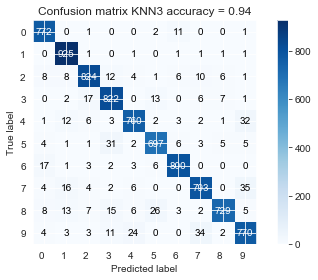

In [15]:
# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_pred_KNN3, classes=class_names,
                      title=('Confusion matrix KNN3 accuracy = {:.2f}'.format(score_3)))
plt.show()
                      


Lets apply our model to unseen data file provided text.csv

In [16]:
mnist_test = pd.read_csv(r'C:\Users\User\OneDrive\DataMining\Assigments\EndTermAssignment\test.csv') 
mnist_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 167.5 MB


In [17]:
test=mnist_test.to_numpy()

In [18]:
test.shape

(28000, 784)

In [19]:
test = preprocessing.scale(test)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


In [20]:
y_pred_test=KNN_3.predict(test)

In [21]:
y_pred_test.shape

(28000,)

In [22]:
# columns
columns_new = ['Label']

# pass in array and columns
y_pred_test=pd.DataFrame(y_pred_test, columns=columns_new)

And here I am saving the predictions to file using the same format as submission template provided 

In [23]:
y_pred_test.to_csv(r'C:\Users\User\OneDrive\DataMining\Assigments\EndTermAssignment\prediction_submission.csv',index_label='Imageid')

Principal Component Analysis (PCA) applied to this data identifies the combination of attributes (principal components, or directions in the feature space) that account for the most variance in the data. 

Here we plot the different samples on the 2 first principal components.

In [24]:
# Reduce dimension to 2 with PCA
from sklearn.decomposition import PCA 
pca = PCA(n_components=2, random_state=0)


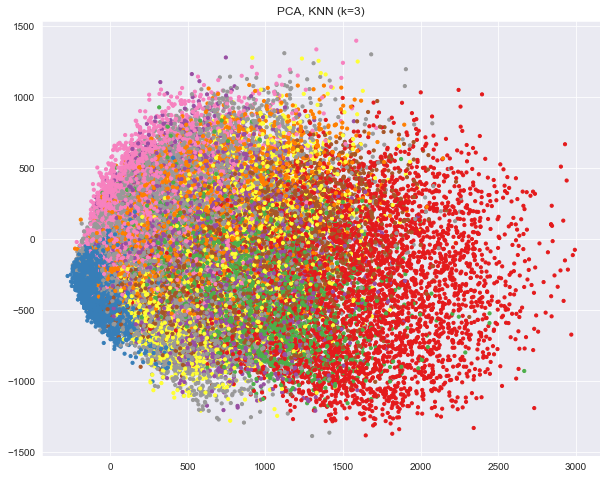

In [25]:
# plt.figure()
dim_reduction_methods =[('PCA', pca)]
label=set(mnist_data['label'])

for i, (name, model) in enumerate(dim_reduction_methods):
    fig = plt.figure(figsize=(10, 8))
    #fig, ax = plt.subplots()
    # Fit the method's model
    model.fit(X_train, y_train)

    # Fit a nearest neighbor classifier on the embedded training set
    KNN_3.fit(model.transform(X_train), y_train)

    # Compute the nearest neighbor accuracy on the embedded test set
    acc_knn = KNN_3.score(model.transform(X_test), y_test)

    # Embed the data set in 2 dimensions using the fitted model
    X_embedded = model.transform(X)

    # Plot the projected points and show the evaluation score
     
    scatter=plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y, s=10, cmap='Set1')
    plt.title("{}, KNN (k={})".format(name,3))
plt.show()

Now I am going to convert into a dataframe for easy labeling 

In [26]:
result=np.column_stack((X_embedded, y)) 

In [27]:
result_df=pd.DataFrame(data=result[0:,0:],index=[i for i in range(result.shape[0])],columns=['pixel'+str(i) for i in range(result.shape[1])])


In [28]:
result_df=result_df.rename(columns={"pixel2": "label"})

In [29]:
label1=result_df[(result_df['label']==1.0)]
label2=result_df[(result_df['label']==2.0)]
label3=result_df[(result_df['label']==3.0)]
label4=result_df[(result_df['label']==4.0)]
label5=result_df[(result_df['label']==5.0)]
label6=result_df[(result_df['label']==6.0)]
label7=result_df[(result_df['label']==7.0)]
label8=result_df[(result_df['label']==8.0)]
label9=result_df[(result_df['label']==9.0)]

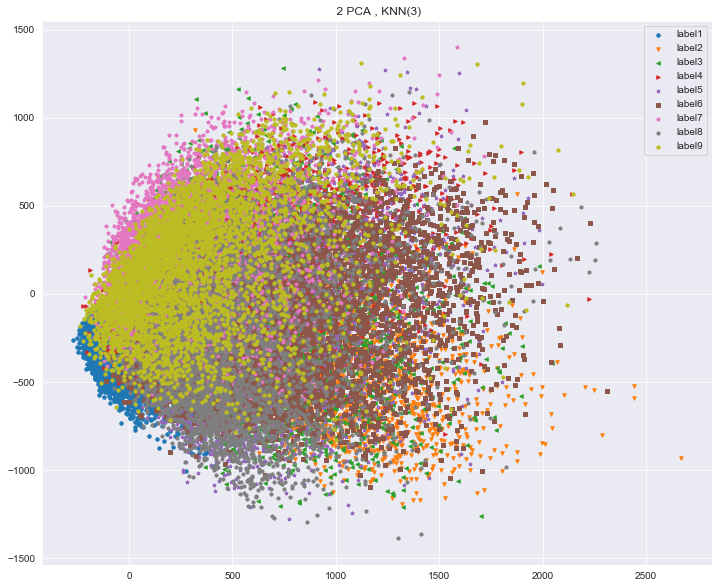

In [30]:
fig = plt.figure(figsize=(12, 10))
scatter=plt.scatter(label1['pixel0'], label1['pixel1'],marker='o',s=12,label='label1')
scatter=plt.scatter(label2['pixel0'], label2['pixel1'],marker='v',s=12,label='label2')
scatter=plt.scatter(label3['pixel0'], label3['pixel1'],marker='<',s=12,label='label3')
scatter=plt.scatter(label4['pixel0'], label4['pixel1'],marker='>',s=12,label='label4')
scatter=plt.scatter(label5['pixel0'], label5['pixel1'],marker='*',s=12,label='label5')
scatter=plt.scatter(label6['pixel0'], label6['pixel1'],marker='s',s=12,label='label6')
scatter=plt.scatter(label7['pixel0'], label7['pixel1'],marker='p',s=12,label='label7')
scatter=plt.scatter(label8['pixel0'], label8['pixel1'],marker='h',s=12,label='label8')
scatter=plt.scatter(label9['pixel0'], label9['pixel1'],marker='8',s=12,label='label9')

plt.title(" 2 PCA , KNN(3)")
plt.legend()
plt.show()